# Fundamental of Data Science

# Heart Disease Prediction

#### Group Members:
Seyed Behdad Ahmadi 1985602

Saeed Zohoorianmoftakharkhodaparast 1955809

Mohammadmehdi Razavi 2023856

Seyed Mohammad Mousavi Nishabouri 1922872

Altynai Toiguliyeva 202713

## Part 1: Logistic Regression

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("framingham_heart_disease.csv")


In [ ]:
print(len(df))

4238


Features Engineering and Analysis

In [ ]:
#First we are going to see how many NaN values we have
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

male               0.000000
age                0.000000
education          0.024776
currentSmoker      0.000000
cigsPerDay         0.006843
BPMeds             0.012506
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            0.011798
sysBP              0.000000
diaBP              0.000000
BMI                0.004483
heartRate          0.000236
glucose            0.091553
TenYearCHD         0.000000
dtype: float64


Text(0.5, 1.0, 'Missing values')

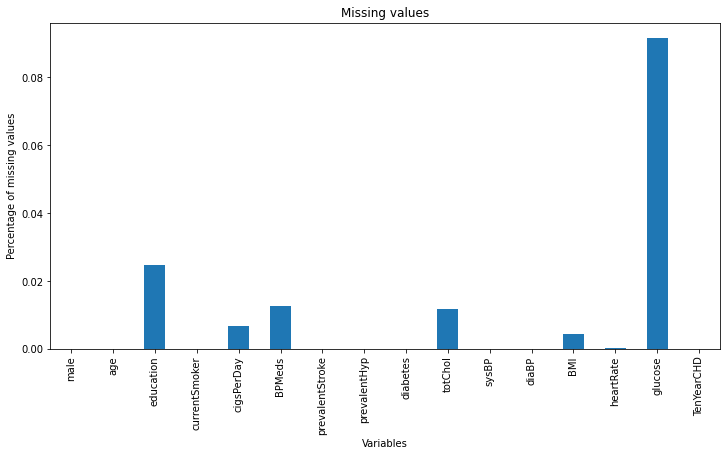

In [ ]:
#Plotting histogram of missing values
missing_values_mean = df.isnull().mean()
print(missing_values_mean)
missing_values_mean.plot.bar(figsize=(12,6))
plt.ylabel("Percentage of missing values")
plt.xlabel("Variables")
plt.title("Missing values")

As we can see, `glucose` has the most missing values among the all variables
The best we can do is removing NaN values

In [ ]:
#Removing NaN values
df = df.dropna()
#Let's check again how many missing values we have after removing them
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

So now we don't have any missing values
Now we can check features data types

In [ ]:
print(df.dtypes) #To see data types of our variable

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object


In [ ]:
print(df.nunique()) #Getting all unique values of dataframe

male                  2
age                  39
education             4
currentSmoker         2
cigsPerDay           33
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             241
sysBP               231
diaBP               142
BMI                1297
heartRate            72
glucose             138
TenYearCHD            2
dtype: int64


So we have `male,education,BPMeds,prevalentStroke,prevalentHyp,diabetes` as categorical variables.
Let's see our variables distributions

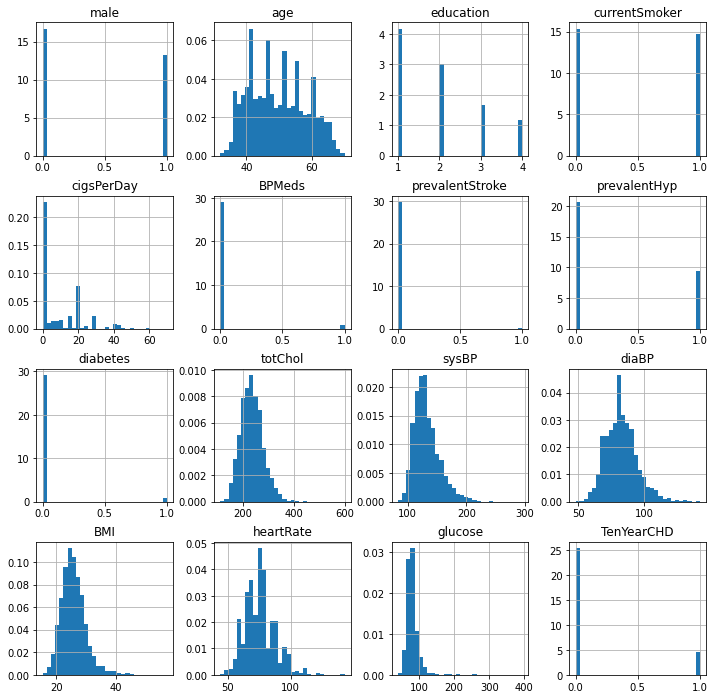

In [ ]:
df.hist(bins=30, figsize=(12,12), density=True)
plt.show()

Now we plot variables correlation to see which features are correlated with our target

<AxesSubplot:>

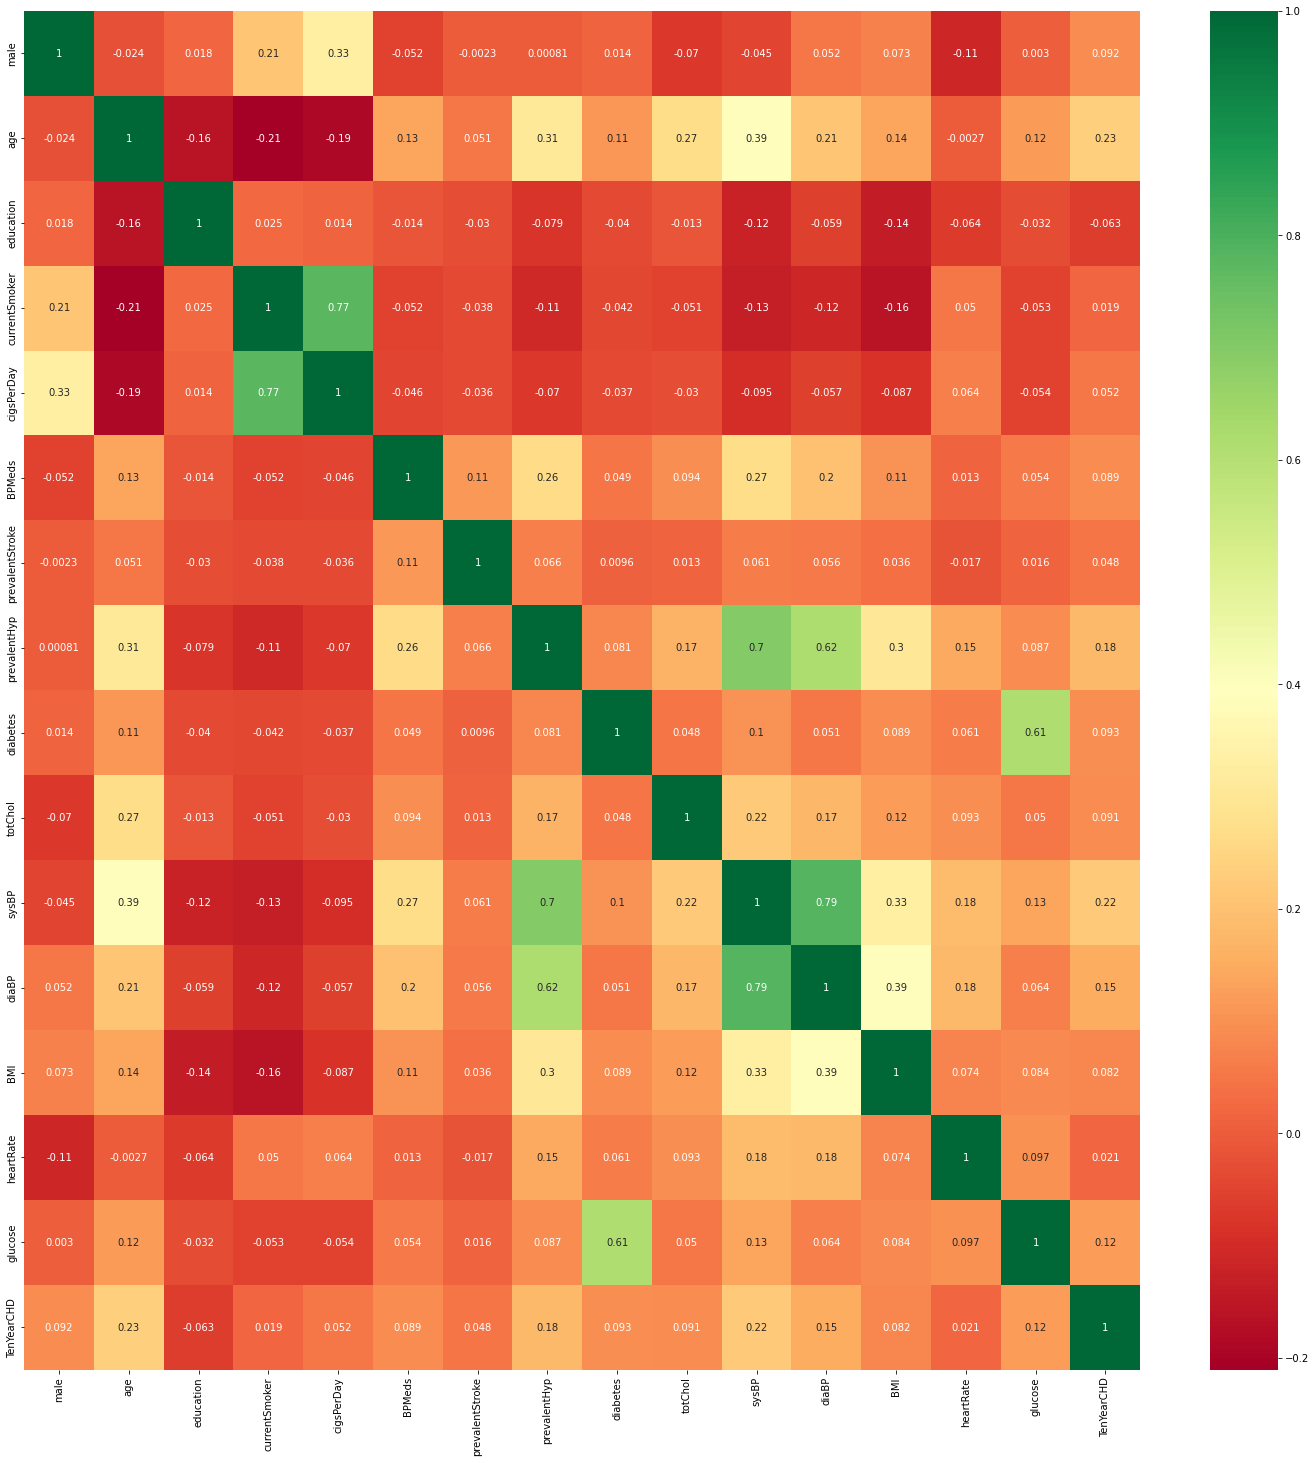

In [ ]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

As we can see there are some features that are highly correlated with each other.
We can trim some of them to reduce dimension of our features.
`sysBP` and `diaBP` are highly correlated. (0.79)
`prevalentHyp` and `sysBP` are highly correlated. (0.7)
`currentSmoker` and `cigsPerday` are highly correlated. (0.77)
Now we check how each of these features are correlated with our target (`TenYearCHD`)
We trim these features because they are less correlated with our target:
`currentSmoker` = 0.019
`diaBP` = 0.15
`prevalentHyp` = 0.18

Now we find important features by performing a Logistic Regression and evaluating coefficients

Feature: 0, Score: 0.55859
Feature: 1, Score: 0.06324
Feature: 2, Score: -0.04757
Feature: 3, Score: 0.08133
Feature: 4, Score: 0.01752
Feature: 5, Score: 0.15378
Feature: 6, Score: 0.70114
Feature: 7, Score: 0.24582
Feature: 8, Score: 0.00355
Feature: 9, Score: 0.00230
Feature: 10, Score: 0.01538
Feature: 11, Score: -0.00442
Feature: 12, Score: 0.00621
Feature: 13, Score: -0.00342
Feature: 14, Score: 0.00728


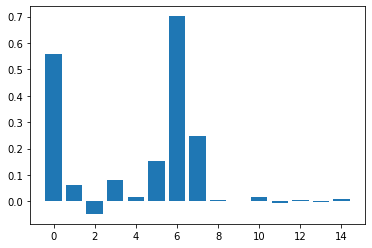

In [ ]:
from sklearn.linear_model import LogisticRegression #Importing LogisticRegression module
lr_model = LogisticRegression(max_iter=1000000,n_jobs=-1) #Defining an instance
lr_X = df.drop(["TenYearCHD"],axis=1).values #Features matrix
lr_Y = df["TenYearCHD"].values #Target vector
lr_model.fit(lr_X, lr_Y) #Fitting the model
importance = lr_model.coef_[0]
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
#Plotting features importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Second method, we use is using RandomForestClassifier to find important features.

Feature: 0, Score: 0.02131
Feature: 1, Score: 0.12335
Feature: 2, Score: 0.03743
Feature: 3, Score: 0.01172
Feature: 4, Score: 0.04996
Feature: 5, Score: 0.00658
Feature: 6, Score: 0.00367
Feature: 7, Score: 0.01771
Feature: 8, Score: 0.00655
Feature: 9, Score: 0.12029
Feature: 10, Score: 0.13246
Feature: 11, Score: 0.12075
Feature: 12, Score: 0.12991
Feature: 13, Score: 0.09547
Feature: 14, Score: 0.12284


<BarContainer object of 15 artists>

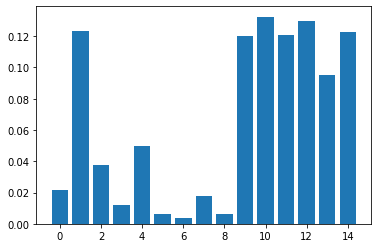

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_jobs=-1)
rf_X = df.drop(["TenYearCHD"],axis=1).values #Features matrix
rf_Y = df["TenYearCHD"].values #Target vector
rf_model.fit(rf_X, rf_Y)
# get importance
importance = rf_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)

As we can see important features are 1,9,10,11,12,13,14
Now we get their names

In [ ]:
important_features = [1,9,10,11,12,13,14]
important_features = df.columns[important_features]
important_features

Index(['age', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose'], dtype='object')

So `age,totChol,sysBP,diaBP,BMI,heartRate,glucose` are the most important features.

Third method,we use the chi-squared (chi²) statistical test.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
x = df.drop(["TenYearCHD"],axis=1) #Features matrix
y = df["TenYearCHD"].values #Target vector
#Apply SelectKBest class to extract top 10 best features
kBestFeatures = SelectKBest(score_func=chi2, k=10)
fit = kBestFeatures.fit(x,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(x.columns)
#Concat two dataframes for better visualization
featureScores = pd.concat([df_columns,df_scores],axis=1)
featureScores.columns = ['Specs','Score']
print(featureScores.nlargest(10,'Score'))

           Specs       Score
10         sysBP  669.506552
14       glucose  379.583137
1            age  295.507761
9        totChol  249.153078
4     cigsPerDay  156.567318
11         diaBP  142.878574
7   prevalentHyp   82.967184
8       diabetes   31.027987
5         BPMeds   28.153003
0           male   17.120430


Before that, we should see how our target is balanced to know which metrics we should use to evaluate our model.

0    0.847648
1    0.152352
Name: TenYearCHD, dtype: float64


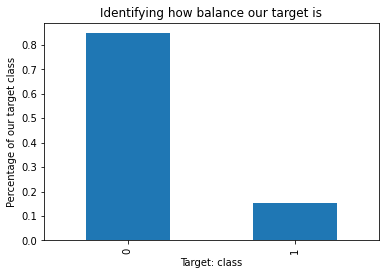

In [ ]:
target_frequency = df['TenYearCHD'].value_counts() / len(df)
print(target_frequency)
fig = target_frequency.sort_values(ascending=False).plot.bar()
fig.set_ylabel('Percentage of our target class')
fig.set_xlabel('Target: class')
fig.set_title('Identifying how balance our target is')
plt.show()

Our dataset is imbalanced so we should use `confustion_matrix` and `roc_auc_score`.
Also we over-sample our dataset to have a balance dataset.

Our selected features are: age,totChol,sysBP,diaBP,BMI,heartRate,glucose,cigsPerDay
All of selected features are numerical. So we should normalize them to improve our model.

In [ ]:
important_features = ['age', 'totChol', 'sysBP', 'diaBP', 'glucose','cigsPerDay']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report,roc_curve,f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.ensemble import StackingClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Defining our features matrix with important features
age = df["age"].values
cigsPerDay = df["cigsPerDay"].values
numerical_features = ["totChol","sysBP","diaBP","glucose"]
nominal_features = ["age","cigsPerDay"]
X = df[important_features]
print(X)
def NumericalScaling():
    for c in numerical_features:
        scaler = RobustScaler()
        X[[c]] = scaler.fit_transform(X[[c]])
    for c in nominal_features:
        binsDiscretizer = KBinsDiscretizer(n_bins=10, encode='ordinal',
                                           strategy='quantile')
        X[[c]] = binsDiscretizer.fit_transform(X[[c]])

NumericalScaling()
X = X.values
print(X)
Y = df["TenYearCHD"].values


      age  totChol  sysBP  diaBP  glucose  cigsPerDay
0      39    195.0  106.0   70.0     77.0         0.0
1      46    250.0  121.0   81.0     76.0         0.0
2      48    245.0  127.5   80.0     70.0        20.0
3      61    225.0  150.0   95.0    103.0        30.0
4      46    285.0  130.0   84.0     85.0        23.0
...   ...      ...    ...    ...      ...         ...
4231   58    187.0  141.0   81.0     81.0         0.0
4232   68    176.0  168.0   97.0     79.0         0.0
4233   50    313.0  179.0   92.0     86.0         1.0
4234   51    207.0  126.5   80.0     68.0        43.0
4237   52    269.0  133.5   83.0    107.0         0.0

[3656 rows x 6 columns]
[[ 1.         -0.68122271 -0.81481481 -0.8        -0.0625      0.        ]
 [ 4.          0.27947598 -0.25925926 -0.06666667 -0.125       0.        ]
 [ 4.          0.19213974 -0.01851852 -0.13333333 -0.5         3.        ]
 ...
 [ 5.          1.37991266  1.88888889  0.66666667  0.5         0.        ]
 [ 5.         -0.47161

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying 

Now we OverSample our dataset to have a balanced dataset

In [ ]:
#OverSampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=43)
x_ros, y_ros = ros.fit_resample(X, Y)
print(np.unique(y_ros,return_counts=True))


(array([0, 1]), array([3099, 3099]))


In [ ]:
trainX,testX,trainY,testY = train_test_split(x_ros,y_ros,test_size=0.3,random_state=43)
stacking = [('nb',RandomForestClassifier(n_jobs=-1)),('lr',LogisticRegression(n_jobs=-1))]
stacking = StackingClassifier(estimators=stacking,n_jobs=-1)
rf = RandomForestClassifier(n_jobs=-1)
lr = LogisticRegression(max_iter=10000,n_jobs=-1)
nb = GaussianNB()
svc = SVC()
knn = KNeighborsClassifier(n_jobs=-1,n_neighbors=2)
models = [lr,nb,svc,knn,rf,stacking]
names = ["Logistic Regression","Gaussuian Naive Bayes","Support Vector Machines","K Nearest Neighbors","Random Forest","Stacking Classifier"]
def RunModel(model,name):
    print("----------------------------")
    print(name)
    model.fit(trainX,trainY)
    pred = model.predict(testX)
    score = accuracy_score(testY,pred)
    print("Accuracy = {}".format(score))
    matrix = confusion_matrix(pred,testY)
    print("Confusion Matrix")
    print(matrix)
    print("ROC AUC Score = {} ".format(roc_auc_score(pred,testY)))
    print("Classification Report")
    print(classification_report(pred,testY))
    print("F1 Score: {} ".format(f1_score(pred,testY)))


for _i in range(len(models)):
    RunModel(models[_i],names[_i])

----------------------------
Logistic Regression
Accuracy = 0.660752688172043
Confusion Matrix
[[596 286]
 [345 633]]
ROC AUC Score = 0.6614881126274641 
Classification Report
              precision    recall  f1-score   support

           0       0.63      0.68      0.65       882
           1       0.69      0.65      0.67       978

    accuracy                           0.66      1860
   macro avg       0.66      0.66      0.66      1860
weighted avg       0.66      0.66      0.66      1860

F1 Score: 0.6673695308381655 
----------------------------
Gaussuian Naive Bayes
Accuracy = 0.6209677419354839
Confusion Matrix
[[752 516]
 [189 403]]
ROC AUC Score = 0.6369015900758802 
Classification Report
              precision    recall  f1-score   support

           0       0.80      0.59      0.68      1268
           1       0.44      0.68      0.53       592

    accuracy                           0.62      1860
   macro avg       0.62      0.64      0.61      1860
weighted avg    

## Part 2: Image Classification


### Data Preparation

In [1]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical
from sklearn.utils import class_weight
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive

drive.mount('/content/drive')

# load data
train_df=pd.read_csv('/content/drive/MyDrive/FDS Final Project/archive/mitbih_train.csv',header=None)
test_df=pd.read_csv('/content/drive/MyDrive/FDS Final Project/archive/mitbih_test.csv',header=None)
train_df.head()

Mounted at /content/drive


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,0.044118,0.061275,0.066176,0.061275,0.049020,0.073529,0.061275,0.061275,0.066176,0.068627,0.095588,0.075980,0.093137,0.105392,0.115196,0.102941,0.117647,0.125000,0.142157,0.127451,0.151961,0.144608,0.164216,0.144608,0.159314,0.151961,0.154412,0.142157,0.151961,0.151961,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,0.074074,0.062678,0.065527,0.065527,0.062678,0.076923,0.071225,0.082621,0.091168,0.096866,0.082621,0.082621,0.091168,0.105413,0.122507,0.148148,0.182336,0.193732,0.213675,0.207977,0.222222,0.253561,0.270655,0.287749,0.284900,0.293447,0.256410,0.247863,0.188034,0.145299,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,0.056757,0.043243,0.067568,0.062162,0.078378,0.072973,0.086486,0.081081,0.108108,0.110811,0.135135,0.135135,0.170270,0.183784,0.216216,0.237838,0.270270,0.286486,0.316216,0.318919,0.332432,0.297297,0.267568,0.216216,0.189189,0.132432,0.118919,0.064865,0.064865,0.043243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,0.063536,0.082873,0.085635,0.093923,0.113260,0.124309,0.140884,0.132597,0.140884,0.091160,0.085635,0.074586,0.071823,0.080110,0.096685,0.118785,0.138122,0.140884,0.138122,0.146409,0.110497,0.102210,0.060773,0.027624,0.038674,0.013812,0.011050,0.013812,0.033149,0.005525,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,0.131455,0.122066,0.140845,0.159624,0.150235,0.145540,0.136150,0.169014,0.178404,0.173709,0.183099,0.201878,0.187793,0.164319,0.187793,0.215962,0.215962,0.201878,0.211268,0.230047,0.215962,0.230047,0.239437,0.267606,0.253521,0.230047,0.220657,0.225352,0.211268,0.173709,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87554 entries, 0 to 87553
Columns: 188 entries, 0 to 187
dtypes: float64(188)
memory usage: 125.6 MB


In [3]:
train_df[187]=train_df[187].astype(int)
train_df[187].value_counts()

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

We can see these samples are not balanced here. Most of them are type '0', which is the normal beat. And Fusion Beats are least. So we resample them next, and get a dataset including 100,000 samples where each category has 20,000 samples respectively.

In [4]:
from sklearn.utils import resample
df_1=train_df[train_df[187]==1]
df_2=train_df[train_df[187]==2]
df_3=train_df[train_df[187]==3]
df_4=train_df[train_df[187]==4]
df_0=(train_df[train_df[187]==0]).sample(n=20000,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=20000,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=20000,random_state=124)
df_3_upsample=resample(df_3,replace=True,n_samples=20000,random_state=125)
df_4_upsample=resample(df_4,replace=True,n_samples=20000,random_state=126)

train_df=pd.concat([df_0,df_1_upsample,df_2_upsample,df_3_upsample,df_4_upsample])

To realize different ECG types better, we randomly draw 1 sample from each category to see if there are any difference.

In [5]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))
c

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187
23200,0.938650,0.926380,0.472393,0.092025,0.073620,0.095092,0.058282,0.055215,0.033742,0.046012,0.033742,0.052147,0.024540,0.033742,0.006135,0.027607,0.009202,0.036810,0.024540,0.042945,0.033742,0.046012,0.058282,0.092025,0.098160,0.128834,0.119632,0.156442,0.147239,0.177914,0.174847,0.190184,0.180982,0.187117,0.193252,0.199387,0.187117,0.184049,0.165644,0.156442,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
73743,0.971193,0.868313,0.193416,0.000000,0.090535,0.176955,0.164609,0.209877,0.263374,0.234568,0.226337,0.255144,0.312757,0.349794,0.358025,0.353909,0.358025,0.366255,0.349794,0.333333,0.353909,0.374486,0.370370,0.370370,0.370370,0.403292,0.407407,0.399177,0.432099,0.465021,0.485597,0.506173,0.539095,0.567901,0.584362,0.576132,0.592593,0.617284,0.580247,0.530864,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
78899,0.283688,0.393617,0.457447,0.554965,0.661348,0.677305,0.671986,0.671986,0.680851,0.680851,0.684397,0.677305,0.682624,0.686170,0.700355,0.700355,0.691489,0.698582,0.712766,0.710993,0.707447,0.725177,0.746454,0.753546,0.760638,0.778369,0.781915,0.776596,0.765957,0.773050,0.753546,0.739362,0.730496,0.728723,0.721631,0.718085,0.725177,0.732270,0.742908,0.753546,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80570,1.000000,0.875502,0.453815,0.273092,0.224900,0.208835,0.186747,0.204819,0.180723,0.180723,0.182731,0.192771,0.176707,0.188755,0.186747,0.198795,0.182731,0.192771,0.194779,0.214859,0.192771,0.224900,0.210843,0.238956,0.228916,0.251004,0.244980,0.257028,0.253012,0.279116,0.267068,0.257028,0.236948,0.232932,0.214859,0.210843,0.206827,0.188755,0.188755,0.190763,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
82687,1.000000,0.634568,0.402469,0.195062,0.118519,0.091358,0.103704,0.096296,0.108642,0.093827,0.093827,0.081481,0.091358,0.074074,0.076543,0.064198,0.064198,0.056790,0.061728,0.046914,0.051852,0.037037,0.039506,0.024691,0.024691,0.012346,0.012346,0.002469,0.012346,0.000000,0.009877,0.000000,0.007407,0.002469,0.014815,0.014815,0.032099,0.034568,0.054321,0.054321,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


let's draw a plot of the normal beat, which is type '0' here.

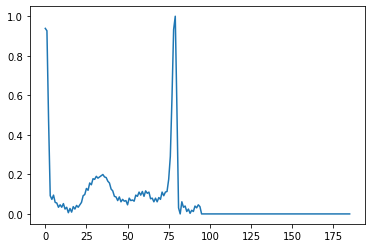

In [6]:
plt.plot(c.iloc[0,:186])


Then we draw the other 4 types ECG which are abnormal below.

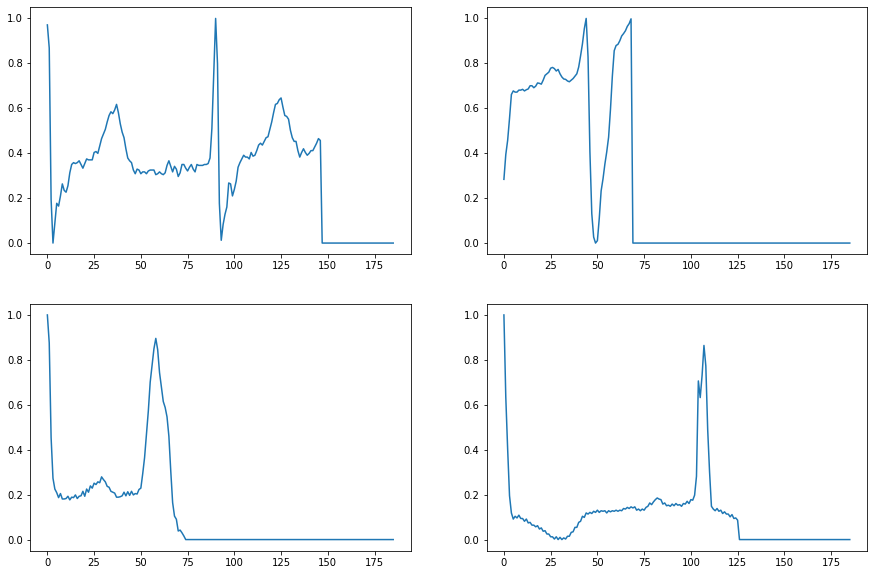

In [7]:
f, axes = plt.subplots(2, 2, sharex=False, sharey=False) 
f.set_figheight(10)
f.set_figwidth(15)
axes[0,0].plot(c.iloc[1,:186])
axes[0,1].plot(c.iloc[2,:186])
axes[1,0].plot(c.iloc[3,:186])
axes[1,1].plot(c.iloc[4,:186])

Since we are not experts in this field, we surfed the internet and found some pictures that helped us to have a glimpse over the ECG images.
![Fusion_beats.gif](attachment:Fusion_beats.gif)



![svt_vs_vt.jpeg](attachment:svt_vs_vt.jpeg)

you can see there are some similarities between these pictures and our plots.

### Modeling

In [8]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values
X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

Since our data is a representation of signal images we decided to use CNN rather RNN. Because it works better for these kind of datasets.
Now that we have the data loaded into memory ready for modeling, we can define, fit, and evaluate a 1D CNN model. We can define a function named network() that takes the train and test dataset, fits a model on the training dataset, evaluates it on the test dataset, and returns an estimate of the models performance.

First, we must define the CNN model using the Keras deep learning library. The output for the model will be a number from 0 to 4 which assigne each input to on of our five categories.

These input and output dimensions are required when fitting the model, and we can extract them from the provided training dataset. The model is defined as a Sequential Keras model, for simplicity.

We will define the model as having three 1D CNN layers, followed by the flatten layer. Then we use 3 layer dense.
The last layer with 5 nodes is our output.


***Note: These days, better performance is achieved using the ReLU activation function***


CNNs learn very quickly. After CNN layer we use 
Batch normalization which applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1. Then we use MaxPool. MaxPool is used for downsampling the input representation by taking the maximum value over a spatial window of size pool_size. The window is shifted by strides. Since we used "same" padding option the resulting output shape is = input_shape / strides

After the CNN, Normalization, and MaxPool, the learned features are flattened to one long vector and pass through a fully connected layers before the output layer used to make a prediction. The fully connected layers ideally provides a buffer between the learned features and the output with the intent of interpreting the learned features before making a prediction.So, we used 3 layers with 64, 32, 5 nodes. Since we want to classify the data into 5 categories, we used softmax activation function.

For this model, we used adam optimizer and categorical cross entropy. Also, we used EarlyStopping to monitor loss value so we may see that sometimes the process will interupt before the 20th epoch.

Once the model is fit, it is evaluated on the test dataset and the accuracy of the fit model on the test dataset is returned.
int

In [13]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    conv1_1=Convolution1D(64, (6), activation='relu', input_shape=im_shape)(inputs_cnn)
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_1)
    conv2_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool1)
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_1)
    conv3_1=Convolution1D(64, (3), activation='relu', input_shape=im_shape)(pool2)
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_1)
    flatten=Flatten()(pool3)
    dense_end1 = Dense(64, activation='relu')(flatten)
    dense_end2 = Dense(32, activation='relu')(dense_end1)
    main_output = Dense(5, activation='softmax', name='main_output')(dense_end2)
    
    
    model = Model(inputs= inputs_cnn, outputs=main_output)
    model.compile(optimizer='adam', loss='categorical_crossentropy',metrics = ['accuracy'])
    
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
             ModelCheckpoint(filepath='/content/drive/MyDrive/FDS Final Project/Checkpoints/best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, y_train,epochs=epoch,callbacks=callbacks, batch_size=batch,validation_data=(X_test,y_test))
    model.load_weights('/content/drive/MyDrive/FDS Final Project/Checkpoints/best_model.h5')
    return(model,history)

In [14]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

epoch,batch=[20,8]
model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/20
12500/12500 [==============================] - 116s 8ms/step - loss: 0.2078 - accuracy: 0.9251 - val_loss: 0.2438 - val_accuracy: 0.9035
Epoch 2/20
12500/12500 [==============================] - 105s 8ms/step - loss: 0.0845 - accuracy: 0.9707 - val_loss: 0.2075 - val_accuracy: 0.9335
Epoch 3/20
12500/12500 [==============================] - 133s 11ms/step - loss: 0.0578 - accuracy: 0.9813 - val_loss: 0.1573 - val_accuracy: 0.9565
Epoch 4/20
12500/12500 [==============================] - 120s 10ms/step - loss: 0.0447 - accuracy: 0.9857 - val_loss: 0.1407 - val_accuracy: 0.9636
Epoch 5/20
12500/12500 [==============================] - 97s 8ms/step - loss: 0.0379 - accuracy: 0.9881 - val_loss: 0.1240 - val_accuracy: 0.9727
Epoch 6/20
12500/12500 [==============================] - 97s 8ms/step - loss: 0.0320 - accuracy: 0.9898 - val_loss: 0.1704 - val_accuracy: 0.9616
Epoch 7/20
12500/12500 [==============================] - 97s 8ms/step - loss: 0.0266 - accuracy: 0.9914 - val_l

In [15]:
model.evaluate((X_test),y_test, verbose=0)[1]

0.9727297425270081

As you can see we achieve the 0.97272 accuracy.

>
>



You can see a summary of our model below.


In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_cnn (InputLayer)     [(None, 186, 1)]          0         
                                                                 
 conv1d (Conv1D)             (None, 181, 64)           448       
                                                                 
 batch_normalization (BatchN  (None, 181, 64)          256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 91, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 89, 64)            12352     
                                                                 
 batch_normalization_1 (Batc  (None, 89, 64)           256   

In [17]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

epoch,batch=[20,16]
model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/20
6250/6250 [==============================] - 55s 9ms/step - loss: 0.1971 - accuracy: 0.9295 - val_loss: 0.2235 - val_accuracy: 0.9187
Epoch 2/20
6250/6250 [==============================] - 55s 9ms/step - loss: 0.0791 - accuracy: 0.9726 - val_loss: 0.1908 - val_accuracy: 0.9384
Epoch 3/20
6250/6250 [==============================] - 54s 9ms/step - loss: 0.0529 - accuracy: 0.9824 - val_loss: 0.1117 - val_accuracy: 0.9694
Epoch 4/20
6250/6250 [==============================] - 53s 9ms/step - loss: 0.0405 - accuracy: 0.9865 - val_loss: 0.1321 - val_accuracy: 0.9638
Epoch 5/20
6250/6250 [==============================] - 54s 9ms/step - loss: 0.0327 - accuracy: 0.9895 - val_loss: 0.2028 - val_accuracy: 0.9491
Epoch 6/20
6250/6250 [==============================] - 54s 9ms/step - loss: 0.0276 - accuracy: 0.9912 - val_loss: 0.1380 - val_accuracy: 0.9669
Epoch 7/20
6250/6250 [==============================] - 53s 9ms/step - loss: 0.0242 - accuracy: 0.9924 - val_loss: 0.1237 - val_ac

In [18]:
model.evaluate((X_test),y_test, verbose=0)[1]

0.9694408774375916

As you can see we achieve the 0.96944 accuracy.

>
>



You can see a summary of our model below.

In [19]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_cnn (InputLayer)     [(None, 186, 1)]          0         
                                                                 
 conv1d_3 (Conv1D)           (None, 181, 64)           448       
                                                                 
 batch_normalization_3 (Batc  (None, 181, 64)          256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_3 (MaxPooling  (None, 91, 64)           0         
 1D)                                                             
                                                                 
 conv1d_4 (Conv1D)           (None, 89, 64)            12352     
                                                                 
 batch_normalization_4 (Batc  (None, 89, 64)           256 

In [20]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

epoch,batch=[20,32]
model,history=network(X_train,y_train,X_test,y_test)

Epoch 1/20
3125/3125 [==============================] - 34s 10ms/step - loss: 0.1925 - accuracy: 0.9305 - val_loss: 0.2101 - val_accuracy: 0.9270
Epoch 2/20
3125/3125 [==============================] - 35s 11ms/step - loss: 0.0729 - accuracy: 0.9753 - val_loss: 0.1315 - val_accuracy: 0.9636
Epoch 3/20
3125/3125 [==============================] - 32s 10ms/step - loss: 0.0501 - accuracy: 0.9833 - val_loss: 0.1302 - val_accuracy: 0.9640
Epoch 4/20
3125/3125 [==============================] - 34s 11ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 0.2288 - val_accuracy: 0.9378
Epoch 5/20
3125/3125 [==============================] - 32s 10ms/step - loss: 0.0294 - accuracy: 0.9903 - val_loss: 0.1619 - val_accuracy: 0.9596
Epoch 6/20
3125/3125 [==============================] - 35s 11ms/step - loss: 0.0255 - accuracy: 0.9919 - val_loss: 0.1200 - val_accuracy: 0.9737
Epoch 7/20
3125/3125 [==============================] - 34s 11ms/step - loss: 0.0198 - accuracy: 0.9938 - val_loss: 0.1434 -

In [21]:
model.evaluate((X_test),y_test, verbose=0)[1]

0.9736890196800232

As you can see we achieve the 0.97368 accuracy.

>
>



You can see a summary of our model below.

In [22]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs_cnn (InputLayer)     [(None, 186, 1)]          0         
                                                                 
 conv1d_6 (Conv1D)           (None, 181, 64)           448       
                                                                 
 batch_normalization_6 (Batc  (None, 181, 64)          256       
 hNormalization)                                                 
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 91, 64)           0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 89, 64)            12352     
                                                                 
 batch_normalization_7 (Batc  (None, 89, 64)           256 